In [22]:
import networkx as nx
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [23]:
def network_SISD(g, N, beta_1, beta_2, beta_3, gamma, delta, mu, S0, I0, max_time):
    pop_size = S0 + I0
    
    i_nodes = list(range(N))
    for i in range(N):
        i_node = random.choice(i_nodes)
        i_nodes.remove(i_node)

        if (i < math.floor(S0/pop_size * N)):
            g.nodes[i_node]['state'] = 'S'
        else:
            g.nodes[i_node]['state'] = 'I1'

    # print(g.nodes(data=True))

    S = len([x for x,y in g.nodes(data=True) if y['state']=='S'])
    I1 = len([x for x,y in g.nodes(data=True) if y['state']=='I1'])
    I2 = len([x for x,y in g.nodes(data=True) if y['state']=='I2'])
    I3 = len([x for x,y in g.nodes(data=True) if y['state']=='I3'])
    D = len([x for x,y in g.nodes(data=True) if y['state']=='D'])
    states = [(0, S/N, I1/N, I2/N, I3/N, D/N)]

    strain_2_time = None
    strain_3_time = None

    for t in range(max_time):
        for node in g.nodes():
            all_neighbors = list(g.neighbors(node))
            neighbors = [n for n in all_neighbors if g.nodes[n]['state'] != 'D']
            if neighbors:
                contact = random.choice(neighbors)
            else:
                contact = None
            if g.nodes[node]['state'] == 'S':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I1'):
                        if random.random() < beta_1:
                            g.nodes[node]['state'] = 'I1'
                            S -= 1
                            I1 += 1
                    elif (g.nodes[contact]['state'] == 'I2'):
                        if random.random() < beta_2:
                            g.nodes[node]['state'] = 'I2'
                            S -= 1
                            I2 += 1
                    elif (g.nodes[contact]['state'] == 'I3'):
                        if random.random() < beta_3:
                            g.nodes[node]['state'] = 'I3'
                            S -= 1
                            I3 += 1
            elif g.nodes[node]['state'] == 'I1':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I2'):
                        if random.random() < beta_2:
                            g.nodes[node]['state'] = 'I2'
                            I1 -= 1
                            I2 += 1
                    elif (g.nodes[contact]['state'] == 'I3'):
                        if random.random() < beta_3:
                            g.nodes[node]['state'] = 'I3'
                            I1 -= 1
                            I3 += 1
                    elif random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I1 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I1 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I2'
                        I1 -= 1
                        I2 += 1
                else:
                    if random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I1 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I1 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I2'
                        I1 -= 1
                        I2 += 1
            elif g.nodes[node]['state'] == 'I2':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I1'):
                        if random.random() < beta_1:
                            g.nodes[node]['state'] = 'I1'
                            I2 -= 1
                            I1 += 1
                    elif (g.nodes[contact]['state'] == 'I3'):
                        if random.random() < beta_3:
                            g.nodes[node]['state'] = 'I3'
                            I2 -= 1
                            I3 += 1
                    elif random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I2 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I2 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I3'
                        I2 -= 1
                        I3 += 1
                else:
                    if random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I2 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I2 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I3'
                        I2 -= 1
                        I3 += 1
            elif g.nodes[node]['state'] == 'I3':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I1'):
                        if random.random() < beta_1:
                            g.nodes[node]['state'] = 'I1'
                            I3 -= 1
                            I1 += 1
                    elif (g.nodes[contact]['state'] == 'I2'):
                        if random.random() < beta_2:
                            g.nodes[node]['state'] = 'I2'
                            I3 -= 1
                            I2 += 1
                    elif random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I3 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I3 -= 1
                        D += 1
                else:
                    if random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I3 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I3 -= 1
                        D += 1
        states.append((t+1, S/N, I1/N, I2/N, I3/N, D/N))
    
        if strain_2_time is None and I2[t] > 0:
            strain_2_time = t
        if strain_3_time is None and I3[t] > 0:
            strain_3_time = t

    # Use the states at strain 2 and strain 3 emergence
    if strain_2_time is not None:
        S_at_2 = S[strain_2_time]
        I1_at_2 = I1[strain_2_time]
        I2_at_2 = 1 / N  # Assuming one individual triggers strain 2
    else:
        S_at_2, I1_at_2, I2_at_2 = 0, 0, 0

    if strain_3_time is not None:
        S_at_3 = S[strain_3_time]
        I1_at_3 = I1[strain_3_time]
        I2_at_3 = I2[strain_3_time]
        I3_at_3 = 1 / N  # Assuming one individual triggers strain 3
    else:
        S_at_3, I1_at_3, I2_at_3, I3_at_3 = 0, 0, 0, 0

    # Calculate R0 values
    # R0_1 = beta_1 / (delta + gamma + mu)
    R0_2 = (mu * I1_at_2 + beta_2 * (S_at_2 + I1_at_2 )/ N) / ((beta_1 * I1_at_2 / N )+ delta + gamma + mu)
    R0_3 = (mu * I2_at_3 + beta_3 * (S_at_3 + I2_at_3 + I1_at_3) / N) / ((beta_2 * I2_at_3 / N )+ (beta_1 * I1_at_3 / N) + delta + gamma)

    return states, R0_2, R0_3

In [24]:
header = "/Users/rohinijanivara/Documents/Academics/Data Science for Epidemiology/Project/Codes_ClusteringCoeff/hetero_cc_0.05.txt"
G = nx.read_edgelist(header)

mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)

0.115 0.12937500000000002 0.14375000000000002 0.05 0.0005 0.0005 0.05 0.95 1000 50


100%|██████████| 50/50 [02:03<00:00,  2.47s/it]

R0 effective 1:  1.1955032780563057
R0 effective 2:  1.4073577481840196
R0 effective 3:  1.6398328396106645

Epidemic size:  0.66564

Peak infection:  0.59708
Peak time:  337

Percolation threshold 1:  0.09619379729930255
Percolation threshold 2:  0.091927585695207
Percolation threshold 3:  0.08766137409111145


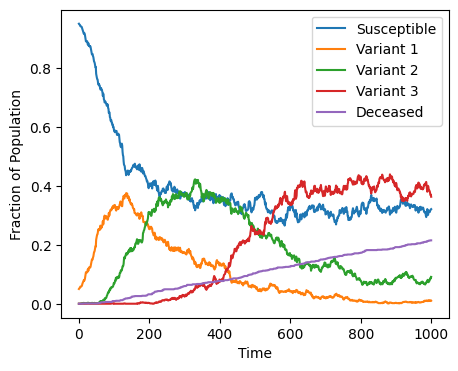

In [34]:
n_nodes = G.number_of_nodes()

beta_1 = 0.115 
beta_2 = beta_1*9/8 
beta_3 = beta_2*10/9
# beta_1=0.05
# beta_2=beta_1*7/4
# beta_3=beta_2*10/7
gamma = 0.05
delta = 0.0005#0.0001
mu = 0.0005#0.00005
I0 = 0.05
S0 = 1 - I0
max_time = 1000
runs = 50
print(beta_1, beta_2, beta_3, gamma, delta, mu, I0, S0, max_time, runs)
cumulative_S = np.zeros(max_time + 1)
cumulative_I1 = np.zeros(max_time + 1)
cumulative_I2 = np.zeros(max_time + 1)
cumulative_I3 = np.zeros(max_time + 1)
cumulative_D = np.zeros(max_time + 1)

fixed_2 = 0
fixed_3 = 0

for i in tqdm(range(runs)):
    results = network_SISD(G, n_nodes, beta_1, beta_2, beta_3, gamma, delta, mu, S0, I0, max_time)
    t, S, I1, I2, I3, D, R0_2, R0_3 = zip(*results)

    cumulative_S = np.add(cumulative_S, S)
    cumulative_I1 = np.add(cumulative_I1, I1)
    cumulative_I2 = np.add(cumulative_I2, I2)
    cumulative_I3 = np.add(cumulative_I3, I3)
    cumulative_D = np.add(cumulative_D, D)
    cumulative_R0_2 = np.add(cumulative_R0_2, R0_2)
    cumulative_R0_3 = np.add(cumulative_R0_3, R0_3)

    if I1[max_time]  == 0:
        if I2[max_time] == 0:
            fixed_3 += 1
        else:
            fixed_2 += 1

average_S = cumulative_S / runs
average_I1 = cumulative_I1 / runs
average_I2 = cumulative_I2 / runs
average_I3 = cumulative_I3 / runs
average_D = cumulative_D / runs
average_R0_2 = cumulative_R0_2 / runs
average_R0_3 = cumulative_R0_3 / runs

fixed_2 = fixed_2 / runs
fixed_3 = fixed_3 / runs

degrees = [d for n, d in G.degree()]
first_moment = sum(degrees) / len(degrees)
second_moment = sum(d**2 for d in degrees) / len(degrees)

R0_1 = beta_1 / (delta + gamma + mu)
r0_eff_1 = R0_1 * (second_moment - first_moment) / first_moment
r0_eff_2 = average_R0_2 * (second_moment - first_moment) / first_moment
r0_eff_3 = average_R0_3 * (second_moment - first_moment) / first_moment

epidemic_size = 1 - average_S[max_time]

peak_infection = max(average_I1 + average_I2 + average_I3)
peak_time = np.argmax(average_I1 + average_I2 + average_I3)

per_1 = (first_moment * (gamma + delta + mu + beta_2 + beta_3)) / (second_moment - first_moment)
per_2 = (first_moment * (gamma + delta + mu + beta_1 + beta_3)) / (second_moment - first_moment)
per_3 = (first_moment * (gamma + delta + mu + beta_1 + beta_2)) / (second_moment - first_moment)

print("R0 effective 1: ", r0_eff_1)
print("R0 effective 2: ", r0_eff_2)
print("R0 effective 3: ", r0_eff_3)
print()
print("Epidemic size: ", epidemic_size)
print()
print("Peak infection: ", peak_infection)
print("Peak time: ", peak_time)
print()
print("Percolation threshold 1: ", per_1)
print("Percolation threshold 2: ", per_2)
print("Percolation threshold 3: ", per_3)

plt.figure(figsize=(5,4))
plt.plot(t, S, label="Susceptible")
plt.plot(t, I1, label="Variant 1")
plt.plot(t, I2, label="Variant 2")
plt.plot(t, I3, label="Variant 3")
plt.plot(t, D, label="Deceased")

plt.xlabel("Time")
plt.ylabel("Fraction of Population")
plt.legend()

In [35]:
r0_eff1_check= beta_1 * (second_moment - first_moment) / (first_moment * (gamma + delta + mu + beta_2 + beta_3))

print(r0_eff1_check)

7.6731188118811895
